## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [35]:
# Your code here - remember to use markdown cells for comments as well!


# KINGS' COUNTY HOUSING PROJECT

## 1. BUSINESS UNDERSTANDING

### 1.1. Project Overview
This project aims to analyze house sales data in King County using regression modeling to estimate house prices and provide insights on how different features, including renovations might impact house prices.

### 1.2. Stakeholders:
1. Real Estate Agents; They will us the model to provide advice to homeowners on property values.
2. Homeowners; They will use the model to make informed decisions about buying,selling or renovating homes.
3. Real Estate Agencies; Intersted in increasing sales and client satisfaction by providing accurate home value estimates.

### 1.3. Business Problem:
Real Estate agencies need a model to estimate house prices and provide advice to homeowners about how  renovations might increase the estimated values of their homes potentially increasing sales and customer satisfaction.


### 1.4. Scope:
Inside Scope:
- Building a regression model to estimate house prices.
- Identifying key features that affect house prices
- Providing actionable insights fot homeownwers regarding renovations.
  
Outside Scope:
- Predicting exact future market trends.
- Estimating prices for houses outside King County.
- Considering economic or policy changes affecting the housing market.


### 1.5 Data Sources
The primary data source is the King County House Sales dataset(kc_house_data.csv).

<!-- Good questions for this stage include:

Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
What business problem(s) will this Data Science project solve for the organization?
What problems are inside the scope of this project?
What problems are outside the scope of this project?
What data sources are available to us?
What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't? -->

### Timeline
Data Understanding and Preparation:  
Modeling: 
Evaluation:
Presentation and Deployment: 


# Q(7)Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

## DATA UNDERSTANDING

Overview:This dataset contains information about King County House Sales with House price as the Target Variable and various features like bedrooms, bathrooms, sqft_living,condition, grade, etc as the Predictors.
Data Characteristics: Numeric variables(eg sqft_living, price number of bedrooms,number of bathrooms etc)and Categorical variables(eg condition, grade etc).

In [36]:
# Import relevant libraries
import pandas as pd 
import numpy as np 

# Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [37]:
import scipy.stats as stat 
from statsmodels.formula.api import ols 
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [38]:
# Load the dataset
df = pd.read_csv('data/kc_house_data.csv')

In [39]:
# Dispaly the first 5 rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [40]:
# Display the last 5 rows of the dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [41]:
# Summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [42]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [43]:
# Data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

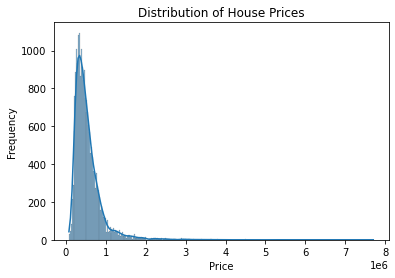

In [44]:
# Distribution of the target variables
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram of 'price' reveals a positively skewed distribution, indicating that a significant number of properties have lower prices while fewer properties command higher prices. To address this skewness and achieve a more symmetrical distribution, we will do a log transformation.

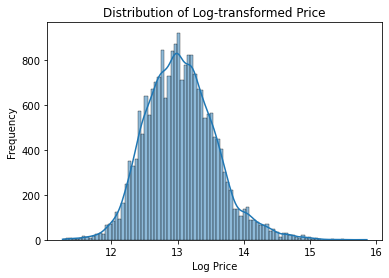

In [45]:

def feature_histogram(feature, log_transform=False):
    """
    Plots a histogram with optional log transformation for a given feature.

    Parameters:
    - feature (str): The column name of the feature to plot.
    - log_transform (bool): If True, applies log transformation to the feature.
    """
    if feature not in df.columns:
        raise ValueError(f"'{feature}' is not a column in the dataframe")

    data = df[feature]
    if log_transform:
        data = np.log1p(data)  # log1p is used to handle zero values

    sns.histplot(data, kde=True)
    plt.title(f'Distribution of {"Log-transformed " if log_transform else ""}{feature.capitalize()}')
    plt.xlabel('Log ' + feature.capitalize() if log_transform else feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

# Assuming df is your DataFrame containing the 'price' column
feature_histogram('price', log_transform=True)


## INDEPENDENT VARIABLES

In [46]:
def plot_independent_vars(features_list, log_transform=False):
    if log_transform == True:
        # Create a figure and axes for the plots
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

        # Loop through each numeric variable and create a distplot
        for i, col in enumerate(features_list):

            log_values = np.log(df[col])
            sns.histplot(data=log_values, ax=axes[i//2, i%2], bins=10, kde=True)
            axes[i//2, i%2].set_title(f'Distribution of {col} (Log Transformed)')    

        # Adjust layout
        plt.tight_layout()
        plt.show()
        
    else:
        # Create a figure and axes for the plots
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

        # Loop through each numeric variable and create a distplot
        for i, col in enumerate(features_list):
            
            sns.histplot(data=df[col], ax=axes[i//2, i%2], bins=10, kde=True)
            axes[i//2, i%2].set_title(f'Distribution of {col}')

        # Adjust layout
        plt.tight_layout()
        plt.show()

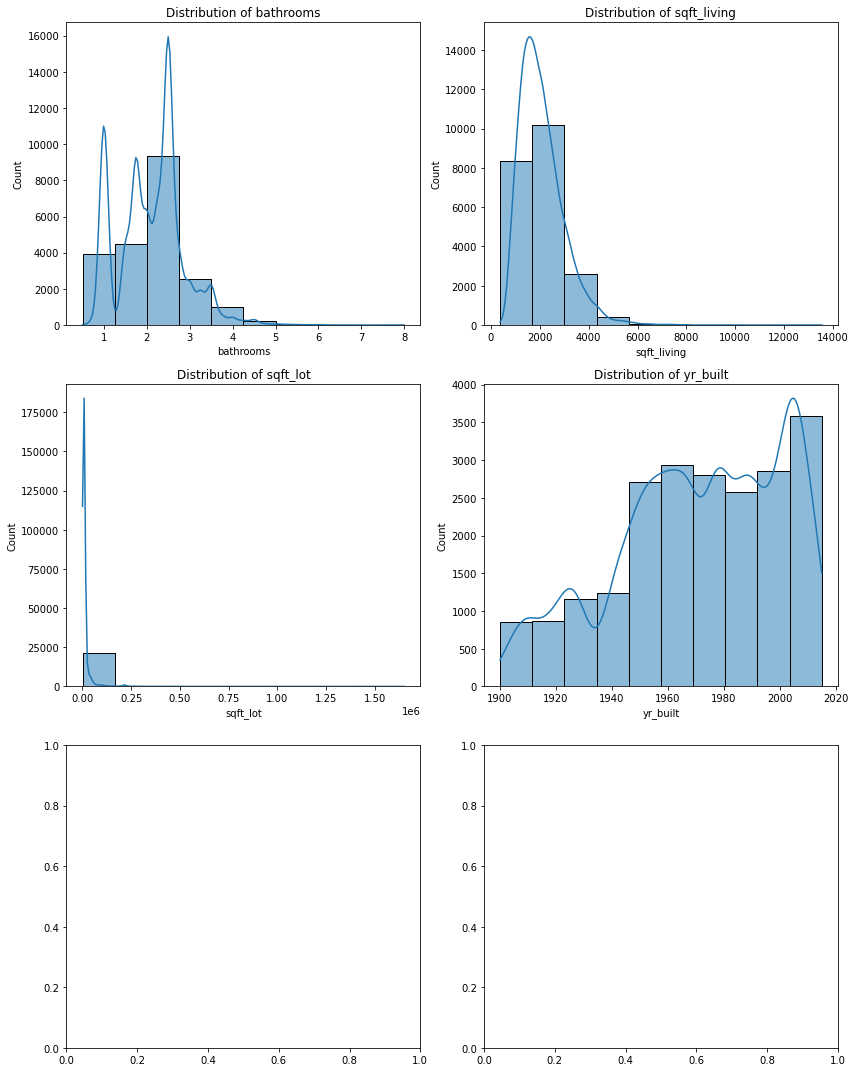

In [47]:
num = ['bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']

plot_independent_vars(num)

##### Comments

Nearly all variables, particularly `sqft_living`, `sqft_lot`, and `age_built`, exhibit positive skewness, we plan to apply log transformations to each variable to assess if the distributions become more normal.

#### Log Transformation og the independent variables

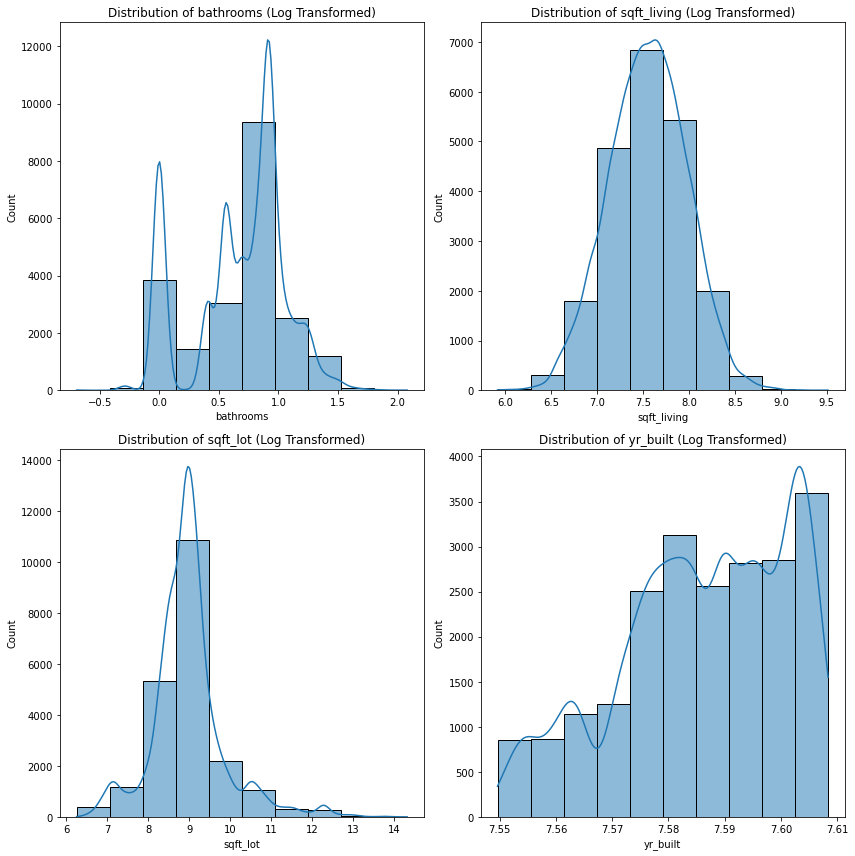

In [48]:
plot_independent_vars(num[:4], log_transform=True)

##### Comments

The log transformation will help stabilize the variance across different levels of the variables, making the relationships between variables more interpretable for the regression modelling.

## Bivariate analysis

Next we will be checking the relationship between price and the numeric independent variables that we will be using.

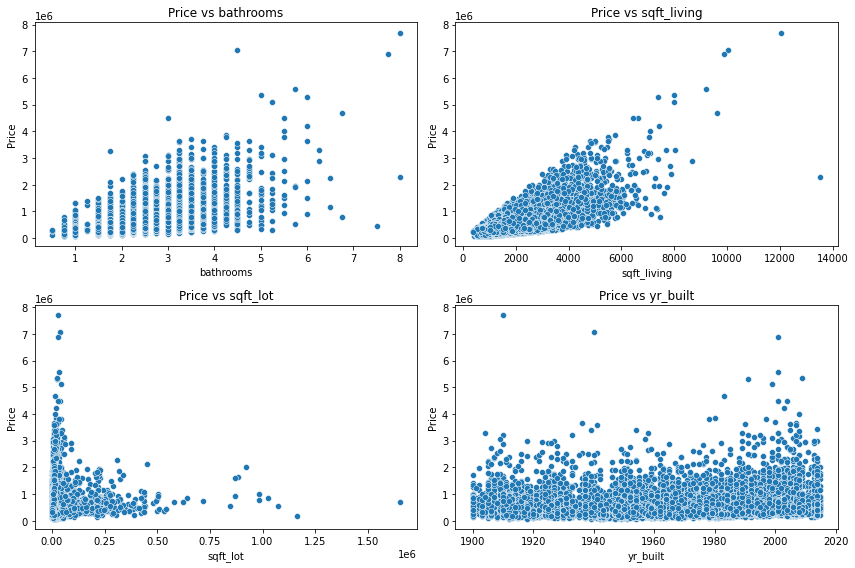

In [49]:
# bivariate analysis for the numerical independent variables
plt.figure(figsize=(12, 8))

for var in num[:4]:
    plt.subplot(2, 2, num.index(var) + 1)
    sns.scatterplot(x=var, y='price', data=df)
    plt.title(f'Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

Only bathrooms and sqft_living have a linear relationship with price 

## Categorical variables

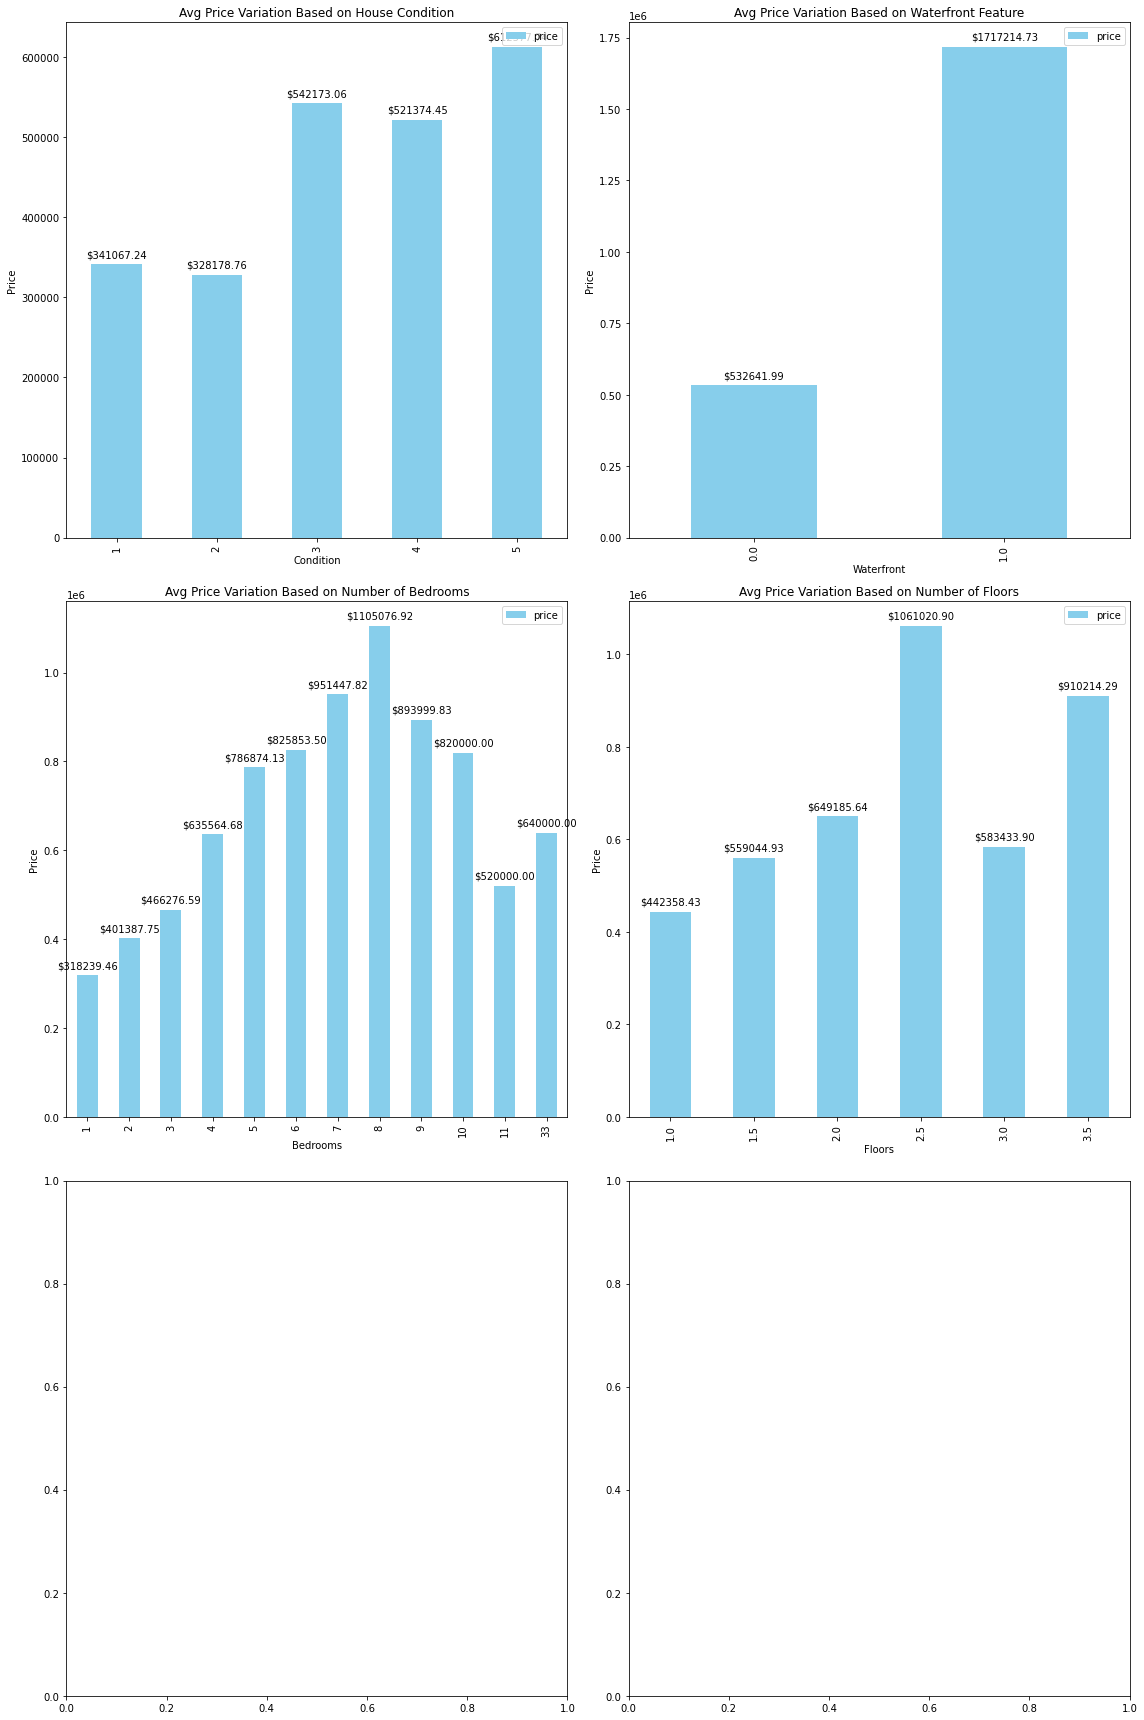

In [50]:
# Define the plots to be created
plots = [
    ('Avg Price Variation Based on House Condition', 'condition', 'Price'),
    ('Avg Price Variation Based on Waterfront Feature', 'waterfront', 'Price'),
    
    ('Avg Price Variation Based on Number of Bedrooms', 'bedrooms', 'Price'),
    ('Avg Price Variation Based on Number of Floors', 'floors', 'Price'),
    
]

# Create a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the plots and create bar plots for each
for i, (title, x_col, y_col) in enumerate(plots):
    if x_col in df.columns:
        # Calculate the average price for each group
        avg_prices = df.groupby(x_col)['price'].mean()
        
        # Convert the series to a DataFrame for plotting
        avg_prices_df = avg_prices.reset_index()
        
        # Create a bar plot for the current plot using Pandas' plot function
        avg_prices_df.plot.bar(x=x_col, y='price', ax=axes[i], color='skyblue', edgecolor='none')
        
        # Set the title, x-axis label, and y-axis label for the current subplot
        axes[i].set_title(title)
        axes[i].set_xlabel(x_col.capitalize())
        axes[i].set_ylabel(y_col)
        
        # Add value labels on top of each bar
        for p in axes[i].patches:  # Loop for each patch (bar) in the current subplot axes[i]
            # Add an annotation to the current subplot
            axes[i].annotate(f"${p.get_height():.2f}",  # Format the annotation with two decimal places and a dollar sign
                             (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the annotation at the top center of each bar
                             ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')  # Annotation properties
    else:
        print(f"Column '{x_col}' does not exist in the DataFrame.")

# Adjust the layout of the subplots for better visualization
plt.tight_layout()
plt.show()


## DATA PREPARATION

### Dropping Features

In [51]:
# Dropping the recommended features
df.drop(columns=['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


### Data Cleaning

In [52]:
# Check for duplicates.
# df.duplicated()
#df.loc[df.duplicated()]
# Implication: No duplicates

In [53]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [54]:
# Fill missing values
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])

# Confirm that there are no more missing values
(df.isnull().sum().sum())  

0

### Checking for Multicollinearity
Let's check the correlation matrix to identify multicollinearity among predictors.

In [55]:
# Check for multicollinearity among selected features
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
correlation_matrix = df[selected_features].corr()
correlation_matrix


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


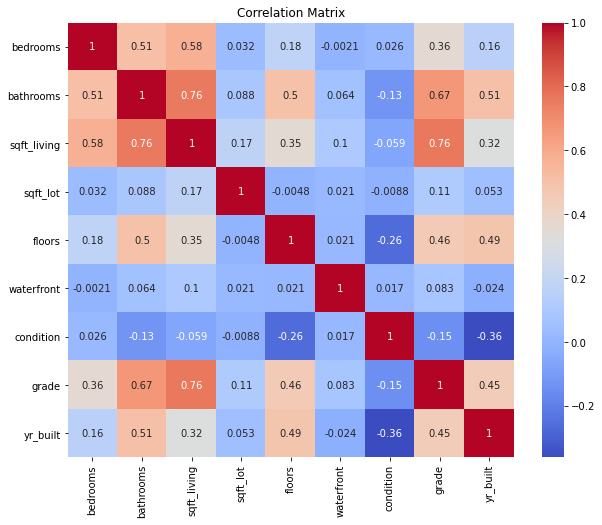

In [56]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Normalization
We will normalize numerical columns to ensure they are on a similar scale.

In [57]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to be normalized
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
scaler = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])


### Categorical Encoding
We need to convert categorical variables (condition, grade) into numeric format using one-hot encoding.

In [58]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['condition', 'grade'])

In [59]:
# Display the first few rows of the prepared dataset
df.head()

# Confirm the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  float64
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  float64
 5   sqft_lot     21597 non-null  float64
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  float64
 8   yr_built     21597 non-null  float64
 9   condition_1  21597 non-null  uint8  
 10  condition_2  21597 non-null  uint8  
 11  condition_3  21597 non-null  uint8  
 12  condition_4  21597 non-null  uint8  
 13  condition_5  21597 non-null  uint8  
 14  grade_3      21597 non-null  uint8  
 15  grade_4      21597 non-null  uint8  
 16  grade_5      21597 non-null  uint8  
 17  grade_6      21597 non-null  uint8  
 18  grade_7      21597 non-null  uint8  
 19  grad

### Preprocessing

Working with categorical data would hinder the modeling process.

A work-around to this hinderance is using **One Hot Encoding** that converts categorical data into numerical data.

In [65]:
def one_hot_encode(df):
    
    # Identify categorical columns (assuming they are of type 'object' or 'category')
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Perform one-hot encoding
    # `drop_first=True` can be used to drop the first level and avoid multicollinearity
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df_encoded

In [66]:
# 'encoding' of categorical features and a view of the 'encoded' dataframe
kc_data_encoded = one_hot_encode(df)
kc_data_encoded

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,condition_1,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,221900.0,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,0.0,-0.544678,0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,538000.0,-0.402903,0.174486,0.533369,-0.189739,0.937431,0.0,-0.680850,0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,180000.0,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,0.0,-1.293626,0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,0.676687,1.149821,-0.131057,-0.243878,-0.915552,0.0,-0.204247,0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,0.0,0.544700,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,-0.402903,0.499597,-0.599424,-0.337306,2.790414,0.0,1.293648,0,...,0,0,0,0,1,0,0,0,0,0
21593,6600060120,400000.0,0.676687,0.499597,0.250171,-0.224246,0.937431,0.0,1.463863,0,...,0,0,0,0,1,0,0,0,0,0
21594,1523300141,402101.0,-1.482493,-1.776184,-1.154928,-0.332018,0.937431,0.0,1.293648,0,...,0,0,0,1,0,0,0,0,0,0
21595,291310100,400000.0,-0.402903,0.499597,-0.523178,-0.306952,0.937431,0.0,1.123432,0,...,0,0,0,0,1,0,0,0,0,0


## Modeling
### Model Selection

In [60]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition_3', 'condition_5', 'grade_6', 'grade_7', 'grade_8', 'yr_built']
target = 'price'
# Split the data into training and testing sets
X = df[selected_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initial Modeling

In [61]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
# Evaluation Metrics for Linear Regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression R^2: {r2}')


Linear Regression MSE: 52567190021.46983
Linear Regression R^2: 0.5963086184331964


### Advanced Modeling

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, and y_test are already defined
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Random Forest R^2: {r2_score(y_test, y_pred)}')



Random Forest MSE: 43820000744.631035
Random Forest R^2: 0.6634829323455658


# Regression for bathrooms

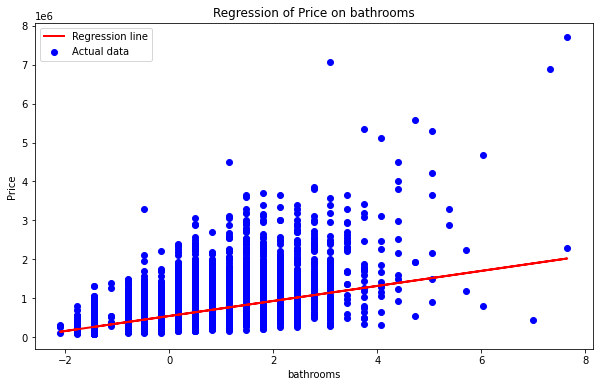

Mean Squared Error (MSE): 97628214882.14302
R-squared (R^2): 0.27657672267607725


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the function to visualize and evaluate regression
def visualize_and_evaluate_regression(x, y, variable_name):
    # Reshape x for sklearn
    x_reshaped = x.values.reshape(-1, 1)
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    # Predict y using the model
    y_pred = model.predict(x_reshaped)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Actual data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
    plt.title(f'Regression of Price on {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R^2): {r2}')

# Using the function
x = kc_data_encoded[['bathrooms']]  # Independent variable
y = kc_data_encoded['price']       # Dependent variable
visualize_and_evaluate_regression(x, y, variable_name='bathrooms')


##### Comment
R-squared value suggests that the number of bathrooms alone explains only a small portion of the variability in house prices, indicating that other factors likely play a significant role in determining house prices.
a high MSE, indicating that it may not be accurately predicting house prices.

# Regression for bedrooms

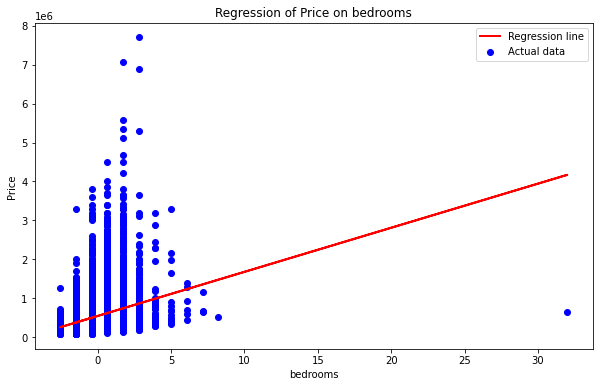

Mean Squared Error (MSE): 122085363262.43721
R-squared (R^2): 0.0953497028373066


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the function to visualize and evaluate regression
def visualize_and_evaluate_regression(x, y, variable_name):
    # Reshape x for sklearn
    x_reshaped = x.values.reshape(-1, 1)
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    # Predict y using the model
    y_pred = model.predict(x_reshaped)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Actual data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
    plt.title(f'Regression of Price on {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R^2): {r2}')

# Using the function for 'bedrooms' variable
x_bedrooms = kc_data_encoded[['bedrooms']]  # Independent variable
y_price = kc_data_encoded['price']          # Dependent variable
visualize_and_evaluate_regression(x_bedrooms, y_price, variable_name='bedrooms')


# Regression for sqft_living

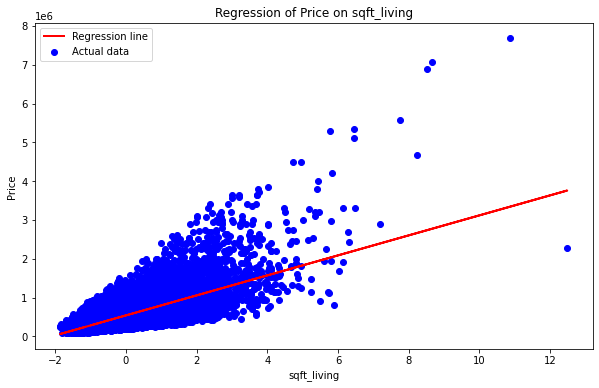

Mean Squared Error (MSE): 68463341389.86132
R-squared (R^2): 0.49268789904035093


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the function to visualize and evaluate regression
def visualize_and_evaluate_regression(x, y, variable_name):
    # Reshape x for sklearn
    x_reshaped = x.values.reshape(-1, 1)
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    # Predict y using the model
    y_pred = model.predict(x_reshaped)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Actual data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
    plt.title(f'Regression of Price on {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R^2): {r2}')

# Using the function for 'sqft_living' variable
x_sqft_living = kc_data_encoded[['sqft_living']]  # Independent variable
y_price = kc_data_encoded['price']                # Dependent variable
visualize_and_evaluate_regression(x_sqft_living, y_price, variable_name='sqft_living')
